In [31]:
from pylab import *
import numpy as np

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

from math import erf, sqrt
import scipy

In [32]:
N = 1

In [47]:
area, area_level, area_sigma_0, area_sigma_1, area_sigma_2 = genfromtxt('./stat_1_dir/surf.dat').T
length, length_level, length_sigma_0, length_sigma_1, length_sigma_2 = genfromtxt('./stat_1_dir/len.dat').T
genus, genus_level = genfromtxt('./stat_1_dir/points.dat').T
nmax, nmax_level = genfromtxt('./stat_1_dir/max.dat').T
nmin, nmin_level = genfromtxt('./stat_1_dir/min.dat').T
nsad, nsad_level = genfromtxt('./stat_1_dir/sad.dat').T

# area, area_level, area_sigma_0, area_sigma_1, area_sigma_2 = genfromtxt('./stat_2_dir/surf.dat').T
# length, length_level, length_sigma_0, length_sigma_1, length_sigma_2 = genfromtxt('./stat_2_dir/len.dat').T
# genus, genus_level = genfromtxt('./stat_2_dir/points.dat').T
# nmax, nmax_level = genfromtxt('./stat_2_dir/max.dat').T
# nmin, nmin_level = genfromtxt('./stat_2_dir/min.dat').T
# nsad, nsad_level = genfromtxt('./stat_2_dir/sad.dat').T

In [48]:
theta = length_sigma_0[0:41][0]/length_sigma_1[0:41][0]
gamma = length_sigma_1[0:41][0] * length_sigma_1[0:41][0] / (length_sigma_0[0:41][0] * length_sigma_2[0:41][0])

In [49]:
# Area gen

mean_area = np.zeros((41))
disp_area_up = np.zeros((41))
disp_area_down = np.zeros((41))

for n in xrange(1, N+1):
    mean_area = mean_area + area[(n-1)*41:41*n]
mean_area = mean_area/N
for n in xrange(1, N+1):
    for k in xrange(0, 41):
        if area[(n-1)*41 + k] > mean_area[k]:
            disp_area_up[k] = disp_area_up[k] + (area[(n-1)*41 + k] - mean_area[k])**2
        else:
            disp_area_down[k] = disp_area_down[k] + (area[(n-1)*41 + k] - mean_area[k])**2
disp_area_up = np.sqrt(disp_area_up)/sqrt(N-1)
disp_area_down = np.sqrt(disp_area_down)/sqrt(N-1)

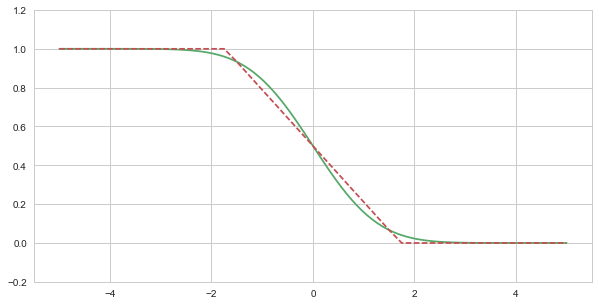

In [50]:
# Area

my_x = np.linspace(-5, 5, 100)
my_y = 0.5 - 0.5 * scipy.special.erf(my_x/sqrt(2))
figure(figsize=(10,5))
plot(my_x, my_y,'g')
plot(area_level[0:41], mean_area, 'r--')
plot(area_level[0:41], mean_area + disp_area_up, 'b--')
plot(area_level[0:41], mean_area - disp_area_down, 'b--')
plot(area_level[0:41], mean_area + 2*disp_area_up, 'y--')
plot(area_level[0:41], mean_area - 2*disp_area_down, 'y--')
ylim(-0.2, 1.2)
show()

In [51]:
# Len gen

mean_length = np.zeros((41))
disp_length_up = np.zeros((41))
disp_length_down = np.zeros((41))

for n in xrange(1, N+1):
    theta = length_sigma_0[(n-1)*41+1]/length_sigma_1[(n-1)*41+1]
    mean_length = mean_length + length[(n-1)*41:41*n]*theta
    
mean_length = mean_length/N
for n in xrange(1, N+1):
    for k in xrange(0, 41):
        if length[(n-1)*41 + k]*theta > mean_length[k]:
            disp_length_up[k] = disp_length_up[k] + (length[(n-1)*41 + k]*theta - mean_length[k])**2
        else:
            disp_length_down[k] = disp_length_down[k] + (length[(n-1)*41 + k]*theta - mean_length[k])**2
            
disp_length_up = np.sqrt(disp_length_up)/sqrt(N-1)
disp_length_down = np.sqrt(disp_length_down)/sqrt(N-1)

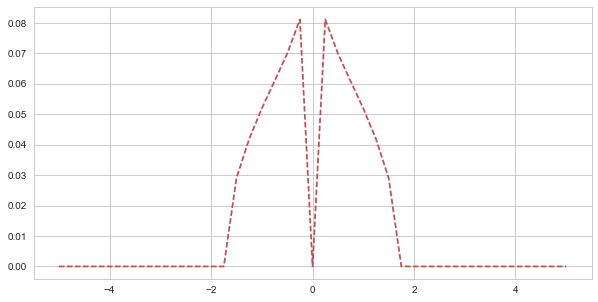

In [54]:
# Len

my_x = np.linspace(-5, 5, 41)
my_y = np.exp(-0.5 * np.square(my_x))
figure(figsize=(10,5))
# plot(my_x, my_y, 'g')
plot(length_level[0:41], mean_length, 'r--')
# plot(length_level[0:41], mean_length + disp_length_up, 'b--')
# plot(length_level[0:41], mean_length - disp_length_down, 'b--')
# plot(length_level[0:41], mean_length + 2*disp_length_up, 'y--')
# plot(length_level[0:41], mean_length - 2*disp_length_down, 'y--')

# xlim((-1, 1))
show()

In [44]:
# Genus gen

mean_genus = np.zeros((41))
disp_genus_up = np.zeros((41))
disp_genus_down = np.zeros((41))

for n in xrange(1, N+1):
    theta = length_sigma_0[(n-1)*41]/length_sigma_1[(n-1)*41]
    mean_genus = mean_genus + genus[(n-1)*41:41*n]*theta*theta
mean_genus = mean_genus/N
for n in xrange(1, N+1):
    for k in xrange(0, 41):
        if genus[(n-1)*41 + k]*theta*theta > mean_genus[k]:
            disp_genus_up[k] = disp_genus_up[k] + (genus[(n-1)*41 + k]*theta*theta - mean_genus[k])**2
        else:
            disp_genus_down[k] = disp_genus_down[k] + (genus[(n-1)*41 + k]*theta*theta - mean_genus[k])**2
disp_genus_up = np.sqrt(disp_genus_up)/sqrt(N-1)
disp_genus_down = np.sqrt(disp_genus_down)/sqrt(N-1)

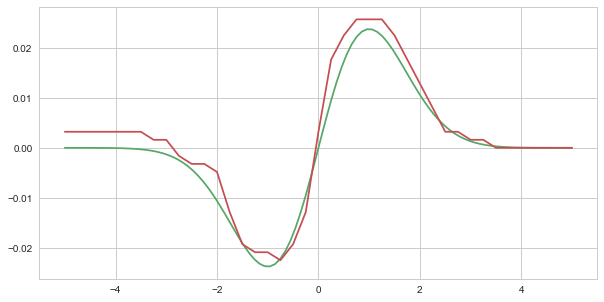

In [45]:
# Genus

my_x = np.linspace(-5, 5, 100)
my_y = my_x*np.exp(-0.5 * np.square(my_x))/(sqrt(pi*pi*pi)) / sqrt(21)
figure(figsize=(10,5))
plot(my_x, my_y, 'g')
plot(genus_level[0:41], mean_genus, 'r')
plot(genus_level[0:41], mean_genus + disp_genus_up, 'b--')
plot(genus_level[0:41], mean_genus - disp_genus_down, 'b--')
plot(genus_level[0:41], mean_genus + 2*disp_genus_up, 'y--')
plot(genus_level[0:41], mean_genus - 2*disp_genus_down, 'y--')
#xlim((0.5, 1.5))
show()